In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a deeper neural network model
class DeeperNN(nn.Module):
    def __init__(self):
        super(DeeperNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

# Initialize the model, optimizer, and loss function
model = DeeperNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Updated train function with tqdm progress bar and more statistics
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch}", leave=False)
    for batch_idx, (data, target) in progress_bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        all_preds.extend(predicted.view(-1).cpu().numpy())
        all_targets.extend(target.view(-1).cpu().numpy())

        progress_bar.set_postfix(loss=train_loss/(batch_idx+1), acc=100.*correct/total)

    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average='macro')
    print(f"\nTrain Epoch: {epoch} - Loss: {train_loss/len(train_loader):.4f}, Accuracy: {100. * correct / total:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Updated test function with tqdm progress bar
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing", leave=False):
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
            all_preds.extend(predicted.view(-1).cpu().numpy())
            all_targets.extend(target.view(-1).cpu().numpy())

    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average='macro')
    print(f"\nTest set: Average loss: {test_loss/len(test_loader):.4f}, Accuracy: {100. * correct / total:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Train and test the model
for epoch in range(1, 31):  # 5 epochs
    train(model, train_loader, optimizer, criterion, epoch)
    test(model, test_loader, criterion)


Train Epoch: 1 - Loss: 0.3716, Accuracy: 88.62%, Precision: 0.89, Recall: 0.88, F1-Score: 0.88



Test set: Average loss: 0.1825, Accuracy: 94.46%, Precision: 0.95, Recall: 0.94, F1-Score: 0.94



Train Epoch: 2 - Loss: 0.1596, Accuracy: 95.08%, Precision: 0.95, Recall: 0.95, F1-Score: 0.95



Test set: Average loss: 0.1274, Accuracy: 96.07%, Precision: 0.96, Recall: 0.96, F1-Score: 0.96



Train Epoch: 3 - Loss: 0.1164, Accuracy: 96.37%, Precision: 0.96, Recall: 0.96, F1-Score: 0.96



Test set: Average loss: 0.1312, Accuracy: 95.96%, Precision: 0.96, Recall: 0.96, F1-Score: 0.96



Train Epoch: 4 - Loss: 0.0962, Accuracy: 96.99%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Test set: Average loss: 0.0969, Accuracy: 96.86%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 5 - Loss: 0.0817, Accuracy: 97.42%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Test set: Average loss: 0.0968, Accuracy: 96.98%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 6 - Loss: 0.0710, Accuracy: 97.77%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Test set: Average loss: 0.0949, Accuracy: 97.15%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 7 - Loss: 0.0607, Accuracy: 98.02%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Test set: Average loss: 0.1041, Accuracy: 96.99%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 8 - Loss: 0.0576, Accuracy: 98.15%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Test set: Average loss: 0.0880, Accuracy: 97.49%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 9 - Loss: 0.0523, Accuracy: 98.35%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Test set: Average loss: 0.0763, Accuracy: 97.76%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 10 - Loss: 0.0479, Accuracy: 98.43%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Test set: Average loss: 0.0989, Accuracy: 97.30%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 11 - Loss: 0.0448, Accuracy: 98.50%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Test set: Average loss: 0.0932, Accuracy: 97.05%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 12 - Loss: 0.0394, Accuracy: 98.69%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0873, Accuracy: 97.53%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 13 - Loss: 0.0381, Accuracy: 98.75%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0852, Accuracy: 97.66%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 14 - Loss: 0.0368, Accuracy: 98.80%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.1003, Accuracy: 97.53%, Precision: 0.98, Recall: 0.98, F1-Score: 0.97



Train Epoch: 15 - Loss: 0.0339, Accuracy: 98.91%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0797, Accuracy: 97.96%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 16 - Loss: 0.0289, Accuracy: 99.02%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0943, Accuracy: 97.50%, Precision: 0.98, Recall: 0.97, F1-Score: 0.97



Train Epoch: 17 - Loss: 0.0279, Accuracy: 99.08%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0953, Accuracy: 97.45%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 18 - Loss: 0.0296, Accuracy: 99.01%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0984, Accuracy: 97.57%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 19 - Loss: 0.0268, Accuracy: 99.10%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0867, Accuracy: 97.97%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 20 - Loss: 0.0233, Accuracy: 99.23%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0923, Accuracy: 97.91%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 21 - Loss: 0.0261, Accuracy: 99.14%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.1163, Accuracy: 97.19%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 22 - Loss: 0.0263, Accuracy: 99.09%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0850, Accuracy: 97.95%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 23 - Loss: 0.0202, Accuracy: 99.34%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.1192, Accuracy: 97.47%, Precision: 0.97, Recall: 0.97, F1-Score: 0.97



Train Epoch: 24 - Loss: 0.0209, Accuracy: 99.29%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0987, Accuracy: 97.65%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 25 - Loss: 0.0211, Accuracy: 99.29%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.1279, Accuracy: 97.54%, Precision: 0.98, Recall: 0.97, F1-Score: 0.98



Train Epoch: 26 - Loss: 0.0220, Accuracy: 99.29%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0936, Accuracy: 97.88%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 27 - Loss: 0.0199, Accuracy: 99.32%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0995, Accuracy: 97.88%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 28 - Loss: 0.0181, Accuracy: 99.40%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.0953, Accuracy: 97.90%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 29 - Loss: 0.0183, Accuracy: 99.41%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.1114, Accuracy: 97.82%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 30 - Loss: 0.0174, Accuracy: 99.43%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Test set: Average loss: 0.1059, Accuracy: 97.69%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98


In [ ]:
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

def test_with_fgsm(model, device, test_loader, epsilon):
    correct = 0
    adv_examples = []

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        # Mask for identifying where initial prediction is equal to the target
        mask = init_pred.flatten() == target

        # If no correct predictions in the batch, skip
        if not mask.any():
            continue

        loss = F.nll_loss(output, target)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data

        perturbed_data = fgsm_attack(data, epsilon, data_grad)
        output = model(perturbed_data)

        final_pred = output.max(1, keepdim=True)[1]
        correct += (final_pred.flatten() == target).sum().item()

    final_acc = correct / float(len(test_loader.dataset))
    print(f"Epsilon: {epsilon}\tTest Accuracy = {final_acc} / {len(test_loader.dataset)} = {final_acc}")

    return final_acc, adv_examples

epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
accuracies = []

for eps in epsilons:
    acc, ex = test_with_fgsm(model, device, test_loader, eps)
    accuracies.append(acc)

Epsilon: 0	Test Accuracy = 0.9154 / 10000 = 0.9154
Epsilon: 0.05	Test Accuracy = 0.8873 / 10000 = 0.8873
Epsilon: 0.1	Test Accuracy = 0.8568 / 10000 = 0.8568
Epsilon: 0.15	Test Accuracy = 0.8193 / 10000 = 0.8193
Epsilon: 0.2	Test Accuracy = 0.7738 / 10000 = 0.7738
Epsilon: 0.25	Test Accuracy = 0.7253 / 10000 = 0.7253
Epsilon: 0.3	Test Accuracy = 0.6793 / 10000 = 0.6793


Using device: cuda
Epsilon: 0	Test Accuracy = 7.04%
Epsilon: 0.05	Test Accuracy = 9.790000000000001%
Epsilon: 0.1	Test Accuracy = 13.04%
Epsilon: 0.15	Test Accuracy = 17.1%
Epsilon: 0.2	Test Accuracy = 22.16%
Epsilon: 0.25	Test Accuracy = 27.68%
Epsilon: 0.3	Test Accuracy = 33.17%


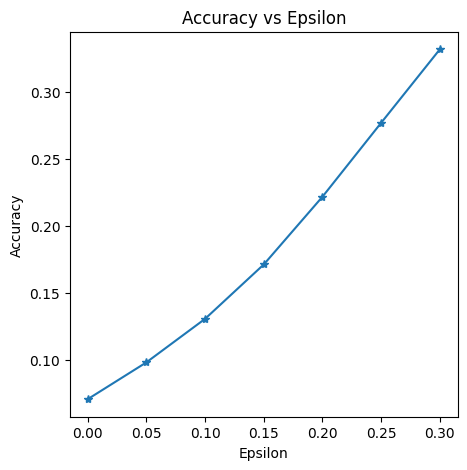

Displaying Adversarial Examples for Epsilon = 0


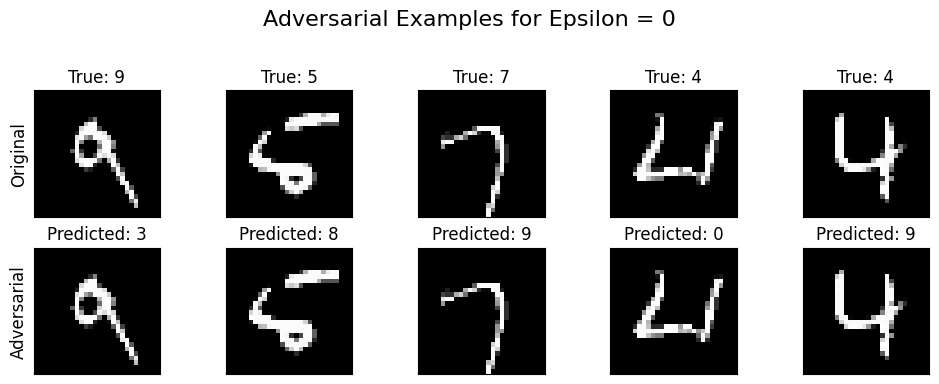

Displaying Adversarial Examples for Epsilon = 0.05


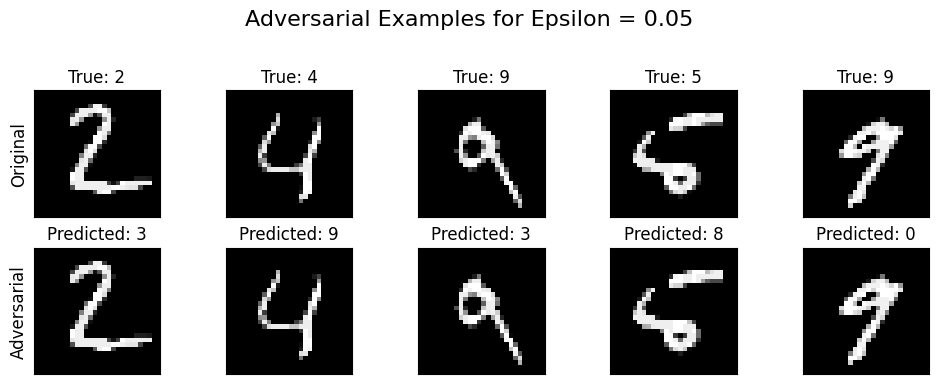

Displaying Adversarial Examples for Epsilon = 0.1


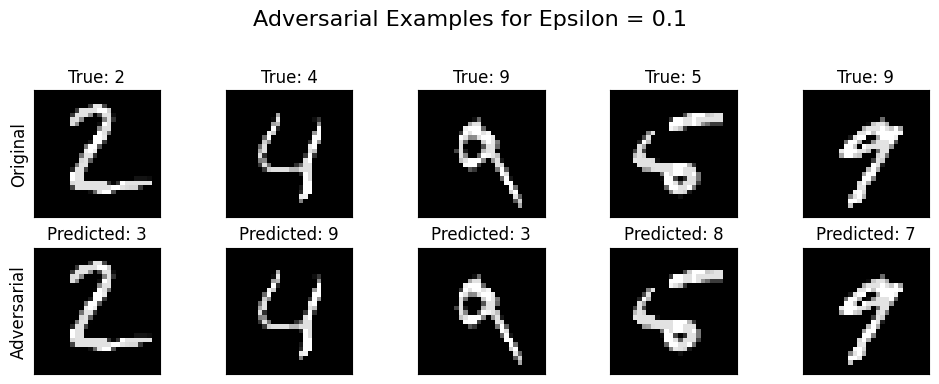

Displaying Adversarial Examples for Epsilon = 0.15


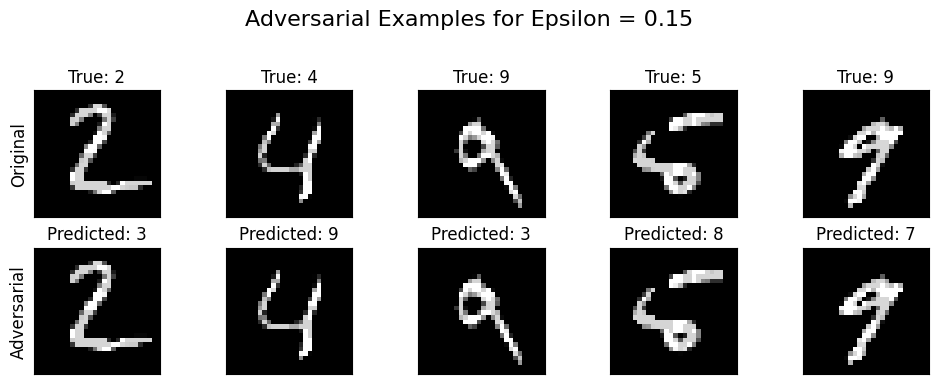

Displaying Adversarial Examples for Epsilon = 0.2


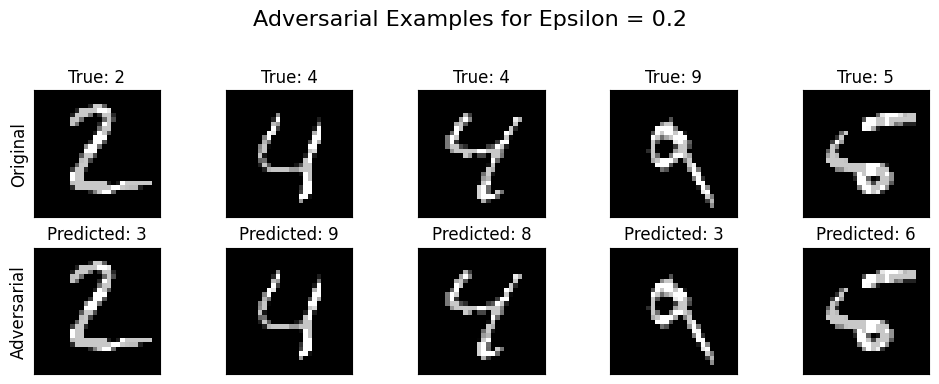

Displaying Adversarial Examples for Epsilon = 0.25


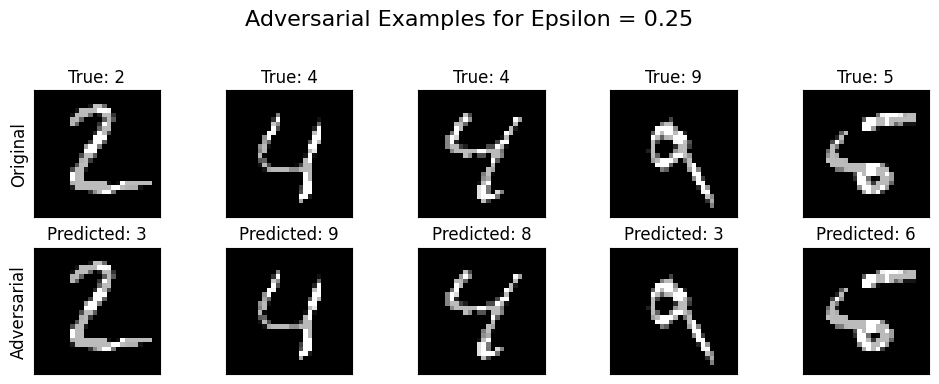

Displaying Adversarial Examples for Epsilon = 0.3


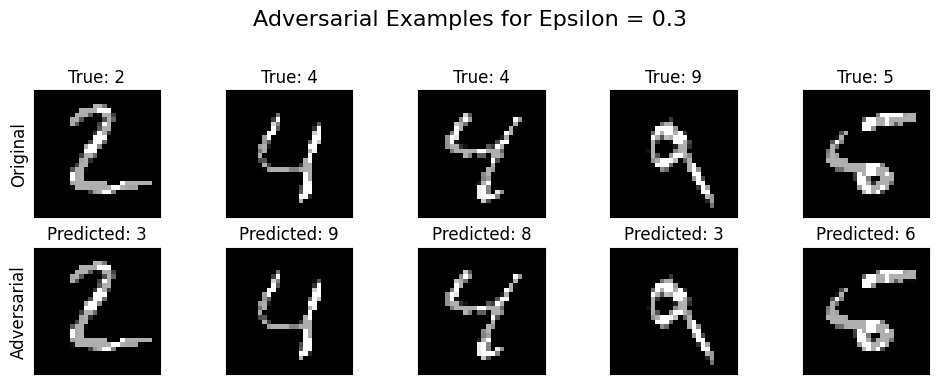

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Move your model to the selected device
model = model.to(device)

# Define the FGSM Attack Function
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

def evaluate_model_with_fgsm_attack(model, test_loader, epsilon, device):
    model.eval()
    correct = 0
    adv_examples = []

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]  # Shape: [batch_size, 1]

        # Check for each image in the batch
        for idx in range(data.size(0)):
            if init_pred[idx].item() != target[idx].item():
                continue

            loss = nn.CrossEntropyLoss()(output[idx].unsqueeze(0), target[idx].unsqueeze(0))
            model.zero_grad()
            loss.backward(retain_graph=True)
            data_grad = data.grad.data

            perturbed_data = fgsm_attack(data[idx].unsqueeze(0), epsilon, data_grad[idx].unsqueeze(0))
            output_perturbed = model(perturbed_data)
            final_pred = output_perturbed.max(1, keepdim=True)[1]

            if final_pred.item() != target[idx].item():
                correct += 1
                if len(adv_examples) < 5:
                    adv_examples.append((init_pred[idx].item(), final_pred.item(), perturbed_data.squeeze().detach().cpu().numpy()))

    final_acc = correct / float(len(test_loader.dataset))
    print(f'Epsilon: {epsilon}\tTest Accuracy = {final_acc * 100}%')

    return final_acc, adv_examples

# Plotting Accuracy vs Epsilon
def plot_accuracy_vs_epsilon(epsilons, accuracies):
    plt.figure(figsize=(5,5))
    plt.plot(epsilons, accuracies, "*-")
    plt.title("Accuracy vs Epsilon")
    plt.xlabel("Epsilon")
    plt.ylabel("Accuracy")
    plt.show()

def display_adversarial_examples(examples, epsilon, num_examples=5):
    examples = examples[:num_examples]
    plt.figure(figsize=(10, 4))
    for i, (orig, adv, ex) in enumerate(examples):
        ex = ex.squeeze()
        plt.subplot(2, num_examples, i + 1)
        plt.xticks([], [])
        plt.yticks([], [])
        if i == 0:
            plt.ylabel('Original', fontsize=12)
        plt.title(f"True: {orig}")
        plt.imshow(ex, cmap='gray')
        plt.subplot(2, num_examples, num_examples + i + 1)
        plt.xticks([], [])
        plt.yticks([], [])
        if i == 0:
            plt.ylabel('Adversarial', fontsize=12)
        plt.title(f"Predicted: {adv}")
        plt.imshow(ex, cmap='gray')
    plt.suptitle(f"Adversarial Examples for Epsilon = {epsilon}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Running the Attack for Different Epsilon Values
epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
accuracies = []
adv_examples = []

for eps in epsilons:
    acc, ex = evaluate_model_with_fgsm_attack(model, test_loader, eps, device)
    accuracies.append(acc)
    adv_examples.append(ex)

plot_accuracy_vs_epsilon(epsilons, accuracies)

num_examples_to_display = 5

for i, eps in enumerate(epsilons):
    print(f"Displaying Adversarial Examples for Epsilon = {eps}")
    display_adversarial_examples(adv_examples[i], eps, num_examples=num_examples_to_display)

Epsilon: 0	Attack Success Rate = 0.7799999999999999%
Epsilon: 0.05	Attack Success Rate = 0.47000000000000003%
Epsilon: 0.1	Attack Success Rate = 0.27999999999999997%
Epsilon: 0.15	Attack Success Rate = 0.16999999999999998%
Epsilon: 0.2	Attack Success Rate = 0.13999999999999999%
Epsilon: 0.25	Attack Success Rate = 0.11%
Epsilon: 0.3	Attack Success Rate = 0.05%


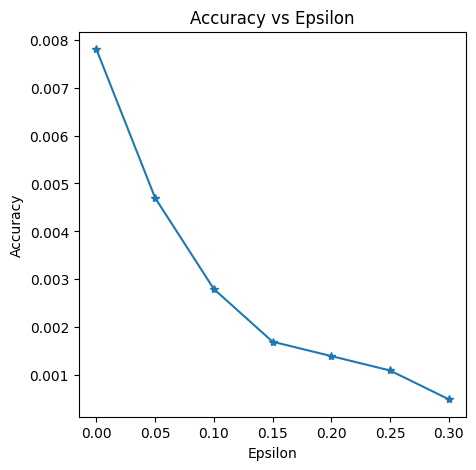

In [ ]:
def evaluate_model_with_fgsm_targeted_attack(model, test_loader, epsilon, device):
    model.eval()
    success_rate = 0

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        # Targeted class is (i+1)%10
        targeted_classes = (target + 1) % 10

        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        # Only attack images that are initially classified correctly
        mask = init_pred.flatten() == target
        if not mask.any():
            continue

        loss = nn.CrossEntropyLoss()(output, targeted_classes)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data

        perturbed_data = fgsm_attack(data, epsilon, data_grad)
        output_perturbed = model(perturbed_data)
        final_pred = output_perturbed.max(1, keepdim=True)[1]

        # Count success if the perturbed data is classified as the targeted class
        success_rate += (final_pred.flatten() == targeted_classes).sum().item()

    total = len(test_loader.dataset)
    success_rate /= total
    print(f'Epsilon: {epsilon}\tAttack Success Rate = {success_rate * 100}%')

    return success_rate

# Running the Targeted Attack for Different Epsilon Values
targeted_epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
targeted_accuracies = []

for eps in targeted_epsilons:
    acc = evaluate_model_with_fgsm_targeted_attack(model, test_loader, eps, device)
    targeted_accuracies.append(acc)

# Plotting Attack Success Rate vs Epsilon
plot_accuracy_vs_epsilon(targeted_epsilons, targeted_accuracies)


Train Epoch: 1 - Loss: 0.4574, Accuracy: 87.43%, Precision: 0.88, Recall: 0.87, F1-Score: 0.88



Train Epoch: 2 - Loss: 0.0809, Accuracy: 97.64%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 3 - Loss: 0.0609, Accuracy: 98.24%, Precision: 0.98, Recall: 0.98, F1-Score: 0.98



Train Epoch: 4 - Loss: 0.0523, Accuracy: 98.52%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 5 - Loss: 0.0452, Accuracy: 98.71%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 6 - Loss: 0.0558, Accuracy: 98.76%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 7 - Loss: 0.0378, Accuracy: 98.96%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 8 - Loss: 0.0341, Accuracy: 99.08%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 9 - Loss: 0.0331, Accuracy: 99.11%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 10 - Loss: 0.0341, Accuracy: 99.19%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 11 - Loss: 0.0317, Accuracy: 99.20%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 12 - Loss: 0.0352, Accuracy: 99.21%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 13 - Loss: 0.0256, Accuracy: 99.34%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 14 - Loss: 0.0239, Accuracy: 99.39%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 15 - Loss: 0.0273, Accuracy: 99.33%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 16 - Loss: 0.0250, Accuracy: 99.42%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 17 - Loss: 0.0238, Accuracy: 99.44%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 18 - Loss: 0.0217, Accuracy: 99.49%, Precision: 0.99, Recall: 0.99, F1-Score: 0.99



Train Epoch: 19 - Loss: 0.0205, Accuracy: 99.51%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 20 - Loss: 0.0209, Accuracy: 99.54%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 21 - Loss: 0.0200, Accuracy: 99.53%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 22 - Loss: 0.0206, Accuracy: 99.54%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 23 - Loss: 0.0229, Accuracy: 99.55%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 24 - Loss: 0.0207, Accuracy: 99.55%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 25 - Loss: 0.0356, Accuracy: 99.52%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 26 - Loss: 0.0223, Accuracy: 99.53%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 27 - Loss: 0.0172, Accuracy: 99.61%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 28 - Loss: 0.0249, Accuracy: 99.54%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 29 - Loss: 0.0220, Accuracy: 99.56%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00



Train Epoch: 30 - Loss: 0.0393, Accuracy: 99.54%, Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Epsilon: 0	Test Accuracy = 1.3%
Epsilon: 0.05	Test Accuracy = 1.6500000000000001%
Epsilon: 0.1	Test Accuracy = 2.06%
Epsilon: 0.15	Test Accuracy = 2.65%
Epsilon: 0.2	Test Accuracy = 3.62%
Epsilon: 0.25	Test Accuracy = 4.9399999999999995%
Epsilon: 0.3	Test Accuracy = 6.569999999999999%


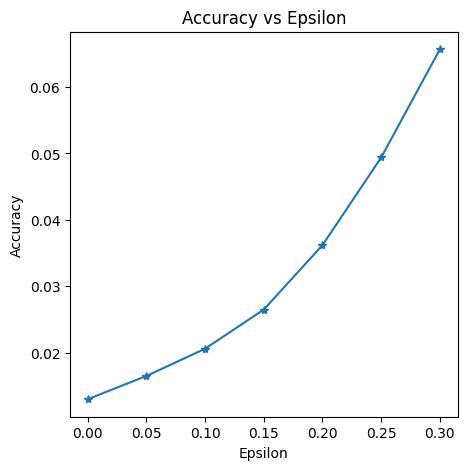

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import precision_recall_fscore_support
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the Deeper Neural Network Model
class DeeperNN(nn.Module):
    def __init__(self):
        super(DeeperNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# Define the FGSM Attack Function
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# Create Adversarial Training Data
def create_adversarial_training_data(model, train_loader, epsilon, device):
    adv_training_data = []
    model.eval()

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data

        perturbed_data = fgsm_attack(data, epsilon, data_grad)
        adv_training_data.extend([(pd.detach().to(device), t.to(device)) for pd, t in zip(perturbed_data, target)])

    return adv_training_data

# Define Model Training Function with Additional Metrics
def train_model(model, train_loader, optimizer, device, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []

    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}", leave=False)
    for batch_idx, (data, target) in progress_bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        all_preds.extend(predicted.view(-1).cpu().numpy())
        all_targets.extend(target.view(-1).cpu().numpy())

        progress_bar.set_postfix(loss=train_loss/(batch_idx+1), acc=100.*correct/total)

    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average='macro')
    print(f"\nTrain Epoch: {epoch+1} - Loss: {train_loss/len(train_loader):.4f}, Accuracy: {100. * correct / total:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Evaluate Model with FGSM Attack
def evaluate_model_with_fgsm_attack(model, test_loader, epsilon, device):
    model.eval()
    correct = 0

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True

        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]

        for idx in range(data.size(0)):
            if init_pred[idx].item() != target[idx].item():
                continue

            loss = nn.CrossEntropyLoss()(output[idx].unsqueeze(0), target[idx].unsqueeze(0))
            model.zero_grad()
            loss.backward(retain_graph=True)
            data_grad = data.grad.data

            perturbed_data = fgsm_attack(data[idx].unsqueeze(0), epsilon, data_grad[idx].unsqueeze(0))
            output_perturbed = model(perturbed_data)
            final_pred = output_perturbed.max(1, keepdim=True)[1]

            if final_pred.item() != target[idx].item():
                correct += 1

    final_acc = correct / float(len(test_loader.dataset))
    return final_acc

# Initialize Model, Optimizer, and Loaders
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeeperNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Adversarial Training
epsilon = 125/255
adv_train_data = create_adversarial_training_data(model, train_loader, epsilon, device)
combined_train_data = TensorDataset(
    torch.cat([train_dataset.data.unsqueeze(1).float().to(device), torch.stack([x[0] for x in adv_train_data])]),
    torch.cat([train_dataset.targets.to(device), torch.tensor([x[1] for x in adv_train_data]).to(device)])
)
combined_train_loader = DataLoader(combined_train_data, batch_size=64, shuffle=True)

# Training the Model
num_epochs = 30
for epoch in range(num_epochs):
    train_model(model, combined_train_loader, optimizer, device, epoch)

# FGSM Attack Evaluation on Adversarially Retrained DNN for a Range of Epsilon Values
epsilons = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
accuracies = []
for eps in epsilons:
    acc = evaluate_model_with_fgsm_attack(model, test_loader, eps, device)
    accuracies.append(acc)
    print(f'Epsilon: {eps}\tTest Accuracy = {acc * 100}%')

# Plotting the Results
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()